
Cipher is : MOBUEWO LI QOUOYNYVA PZYF BOPPOQ IEC GQO EVO ES PZO SOM UZEFOV PE NYFYP CF GP PZO SYSPZ VOJP WEVPZ GVK PGDO TGQP ES PZO OBOUPYEV TQEUOFF MO ZETO PZGP IEC ZGNO PZO TEFFYLYBYPI PE AYNO CF PZO TBOGFCQO ES IECQ UEWTGVI GVK PZGP IEC GUUOTP PZ  ZEVECQ GF MOBB GF PZO QOFTEVFYLYBYPI ES PZYF GFFYAVWOVP PZYF IOGQ PZO WOOPYVA MYBB PGDO TBGUO GP DOVFYVAPEV VYVO PGDO PZO LCF PZQOO ZCVKQOK PMOBNO FONOV FPGPYEVF SQEW PZO UOVPQGB DOOT PZO GKKQOFF GF MOBB GF PZO KGI G FOUQOP LOFP QOAGQKF

{'M': 0.018134715025906734, 'O': 0.15544041450777202, 'B': 0.038860103626943004, 'U': 0.02849740932642487, 'E': 0.06476683937823834, 'W': 0.015544041450777202, 'L': 0.012953367875647668, 'I': 0.025906735751295335, 'Q': 0.046632124352331605, 'Y': 0.05699481865284974, 'N': 0.015544041450777202, 'V': 0.05958549222797927, 'A': 0.015544041450777202, 'P': 0.12176165803108809, 'Z': 0.06476683937823834, 'F': 0.07772020725388601, 'C': 0.025906735751295335, 'G': 0.07253886010362694, 'S': 0.02072538860103627, 'J': 0

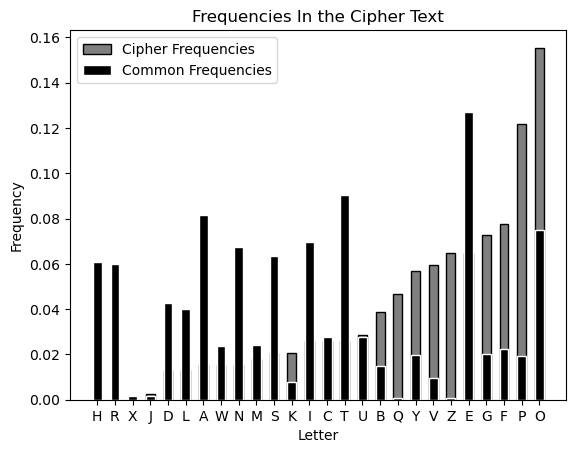

{'H': 'Z', 'R': 'Q', 'X': 'X', 'J': 'J', 'D': 'K', 'L': 'V', 'A': 'B', 'W': 'P', 'N': 'Y', 'M': 'G', 'S': 'F', 'K': 'W', 'I': 'M', 'C': 'U', 'T': 'C', 'U': 'L', 'B': 'D', 'Q': 'R', 'Y': 'H', 'V': 'S', 'Z': 'N', 'E': 'I', 'G': 'O', 'F': 'A', 'P': 'T', 'O': 'E'}
GEDLIPE VM RELEHYHSB TNHA DETTER MIU ORE ISE IF TNE FEG LNIAES TI YHAHT UA OT TNE FHFTN SEJT PISTN OSW TOKE CORT IF TNE EDELTHIS CRILEAA GE NICE TNOT MIU NOYE TNE CIAAHVHDHTM TI BHYE UA TNE CDEOAURE IF MIUR LIPCOSM OSW TNOT MIU OLLECT TN  NISIUR OA GEDD OA TNE REACISAHVHDHTM IF TNHA OAAHBSPEST TNHA MEOR TNE PEETHSB GHDD TOKE CDOLE OT KESAHSBTIS SHSE TOKE TNE VUA TNREE NUSWREW TGEDYE AEYES ATOTHISA FRIP TNE LESTROD KEEC TNE OWWREAA OA GEDD OA TNE WOM O AELRET VEAT REBORWA

ai mode


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#global from : https://mathcenter.oxford.emory.edu/site/math125/englishLetterFreqs/
commonFreq = "ETAOINSHRDLCUMWFGYPBVKJXQZ"
lcf = [c for c in commonFreq]
commonVals = [ 0.12702, 0.09056, 0.08167, 0.07507, 0.06966, 0.06749, 0.06327, 0.06094, 0.05987, 0.04253, 0.04025, 0.02782, 0.02758, 0.02406, 0.02360, 0.02228, 0.02015, 0.01974, 0.01929, 0.01492, 0.00978, 0.00772, 0.00153, 0.00150, 0.00095, 0.00074 ]

def freq(cipher: str) -> dict:
    d = {}
    ignore = {}
    for ch in cipher: 
        if ch.isalpha():
            if ch in d: 
                d[ch] += 1
            else: 
                d[ch] = 1
        else:
            if ch in ignore: 
                ignore[ch] += 1
            else: 
                ignore[ch] = 1
    for c in "ABCDEFGHIJKLMNOPQRSTUVWXYZ":
        if c not in d: 
            d[c] = 0

    for x in d: 
        d[x] /= len(cipher) - sum(list(ignore.values()))
    return d

def crack(cipher: str) -> str: 
    mapOfFreq = freq(cipher)
    print(f"\n{mapOfFreq}")
    
    letterKeys = list(mapOfFreq.keys())
    lettervals = list(mapOfFreq.values())
    print(f"Sum of values : {sum(lettervals)}")

    for i in range(len(letterKeys)): 
        for j in range(i, len(letterKeys)): 
            if lettervals[i] > lettervals[j]:
                lettervals[i], lettervals[j] = lettervals[j], lettervals[i]
                letterKeys[i], letterKeys[j] = letterKeys[j], letterKeys[i]
    
    def plotFreq(d: dict): 
        barW = 0.5
        print(f"{len(commonFreq)}\n")

        print(f"length of both keys and vals : {len(letterKeys), len(lettervals)}")
        plt.bar(letterKeys, lettervals, color='gray', edgecolor='black', width=barW, label='Cipher Frequencies')
        plt.bar(lcf, commonVals, color='k',edgecolor='white', width=barW, label='Common Frequencies')
        plt.title("Frequencies In the Cipher Text")
        plt.xlabel('Letter')
        plt.ylabel('Frequency')
        # plt.xticks([r + barW for r in range(len(lettervals))], letterKeys)
        plt.legend()
        plt.show()

    plotFreq(mapOfFreq) 
    cipher_to_common = {}
    i = 0
    cfreverse = commonFreq[::-1]
    for k in letterKeys:
        cipher_to_common[k] = cfreverse[i]
        i+=1 

    print(cipher_to_common)
    char_list = []
    
    for c in cipher:
        if not c.isalpha(): 
            char_list.append(c) 
        else:
            char_list.append(cipher_to_common[c]) 
    decrypt = "".join(char_list)
    return decrypt

def manual_mode():
    print('\nmanual mode')
    return None

def loadDataNew():
    #data loading
    import os, json
    import pandas as pd
    import kagglehub
    import shutil

    dir_path = kagglehub.dataset_download("bwandowando/479k-english-words")
    json_path = os.path.join(dir_path, "words_dictionary.json")
    with open(json_path, "r", encoding="utf-8") as f:
        d = json.load(f)

    df = pd.DataFrame({"word": list(d.keys()), "value": list(d.values())})
    print(df.head())
    print(df.shape)
    print(dir_path)

    # Destination inside your project
    dest_dir = os.path.join(os.getcwd(), "data", "479k-english-words")

    # Create destination folder if it doesn't exist
    os.makedirs(dest_dir, exist_ok=True)

    # Copy files
    for filename in os.listdir(dir_path):
        shutil.copy2(
            os.path.join(dir_path, filename),
            os.path.join(dest_dir, filename)
        )

    print("Copied to:", dest_dir)
    print("Contents:", os.listdir(dest_dir))

def ai_mode():
    print('\nai mode')
    ans = input("Do you need to downoad the dataset: (y/n)")
    if ans == 'y':
        loadDataNew()

    return None

def main(): 
    ct = input("Enter the Cipher Text")
    print(f"\nCipher is : {ct}")
    first_pass_decrpyt = crack(ct.upper())
    print(first_pass_decrpyt)

    ai_or_manual = input("would you like to crack the cipher manually or using ai ? type 'a' for ai mode or 'm' for manual")
    if ai_or_manual.lower() == 'm': 
        manual_mode()        
    elif ai_or_manual.lower() == 'a':
        ai_mode()

if __name__ == "__main__": 
    main() 
# MOBUEWO LI QOUOYNYVA PZYF BOPPOQ IEC GQO EVO ES PZO SOM UZEFOV PE NYFYP CF GP PZO SYSPZ VOJP WEVPZ GVK PGDO TGQP ES PZO OBOUPYEV TQEUOFF MO ZETO PZGP IEC ZGNO PZO TEFFYLYBYPI PE AYNO CF PZO TBOGFCQO ES IECQ UEWTGVI GVK PZGP IEC GUUOTP PZ  ZEVECQ GF MOBB GF PZO QOFTEVFYLYBYPI ES PZYF GFFYAVWOVP PZYF IOGQ PZO WOOPYVA MYBB PGDO TBGUO GP DOVFYVAPEV VYVO PGDO PZO LCF PZQOO ZCVKQOK PMOBNO FONOV FPGPYEVF SQEW PZO UOVPQGB DOOT PZO GKKQOFF GF MOBB GF PZO KGI G FOUQOP LOFP QOAGQKF

    word  value
0      a      1
1     aa      1
2    aaa      1
3    aah      1
4  aahed      1
(370101, 2)
C:\Users\Georg\.cache\kagglehub\datasets\bwandowando\479k-english-words\versions\5
Copied to: c:\NJIT\cs351\Cyber-Security---Crack-The-Cipher\src\data\479k-english-words
Contents: ['LICENSE.md', 'README.md', 'words.txt', 'words_alpha.txt', 'words_dictionary.json']
